## Import das bibliotecas utilizadas


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import multimode


### Carregamento dos dados para a parte de Modelagem

In [4]:
df_transposed_copy_inputting_v19 = pd.read_csv(r'Projeto/Data/Output/df_transposed_copy_inputting_v19.csv')


## Modelagem

Modelos de Forecasting são divididos em partes pré e pós período desejado para previsão. Os períodos utilizados devem ser equiparáveis ao tipo de questão analisada.

In [5]:
df_model = df_transposed_copy_inputting_v19.copy()

In [6]:
df_model['year'] = pd.to_datetime(df_model['year'], format='ISO8601')


In [7]:
df_model.set_index('year', inplace = True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 1980-01-01 to 2028-01-01
Columns: 228 entries, Afghanistan to World
dtypes: float64(228)
memory usage: 87.7 KB


In [8]:
df_model.head(5)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,4.345486,2.7,-5.4,2.877381,2.4,8.2,0.7,5.290000,5.399885,2.9,...,-0.8,3.3,3.988678,1.8,6.4,0.9,-1.9,3.8,3.991920,2.1
1981-01-01,7.200000,5.7,3.0,0.385714,-4.4,3.8,-5.7,3.798462,-3.624698,4.1,...,-0.5,1.9,1.792949,0.1,0.9,2.0,-0.2,4.2,4.567689,1.9
1982-01-01,5.116667,2.9,6.4,0.371429,0.0,-0.1,-3.1,2.306923,4.538833,0.1,...,1.4,1.5,5.395555,0.6,-0.5,-0.1,0.4,2.2,8.037341,0.7
1983-01-01,4.283333,1.1,5.4,1.471429,4.2,5.4,3.7,0.815385,1.930603,-0.5,...,4.6,1.8,4.752000,1.7,-2.8,3.3,0.7,4.0,3.300508,2.6
1984-01-01,6.166667,2.0,5.6,2.585714,6.0,10.2,2.0,-0.676154,-15.680825,6.3,...,4.1,4.1,-0.599934,2.5,3.9,5.0,0.3,6.6,5.023940,4.6


#### Training and Test set

In [9]:
test_years = 6
train_data = df_model.iloc[:-test_years, :]
train_data.tail(1)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
year,,,,,,,,,,,,,,,,,,,,,
2022-01-01,3.55,3.7,2.9,8.7,2.8,6.4,5.2,12.6,5.7,3.7,...,0.8,4.0,3.5,3.7,4.0,2.3,5.3,2.6,3.9,3.4


In [10]:
test_data = df_model.iloc[-test_years:, :]
test_data.tail(1)


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
year,,,,,,,,,,,,,,,,,,,,,
2028-01-01,5.033333,3.4,1.8,1.5,4.2,2.7,2.0,4.5,1.1,2.3,...,2.3,3.9,1.4,1.7,2.3,1.6,3.7,2.3,4.4,3.0


### TBATS

In [11]:
from tbats import TBATS

In [13]:
#Forecasting Model
#Forecasting Model
#for country in df_model.columns: 
model_tbats = TBATS(use_trend = True,
                    seasonal_periods = [ 365*4])
model_tbats = model_tbats.fit(train_data['United States'])

In [18]:
# Predictions

predictions_tbats = pd.Series(model_tbats.forecast(steps= len(test_data))).rename('tbats')
predictions_tbats.index = test_data.index
predictions_tbats.head()

year
2023-01-01    2.942040
2024-01-01    3.338784
2025-01-01    3.786185
2026-01-01    4.286510
2027-01-01    4.842026
Name: tbats, dtype: float64

<Axes: xlabel='year'>

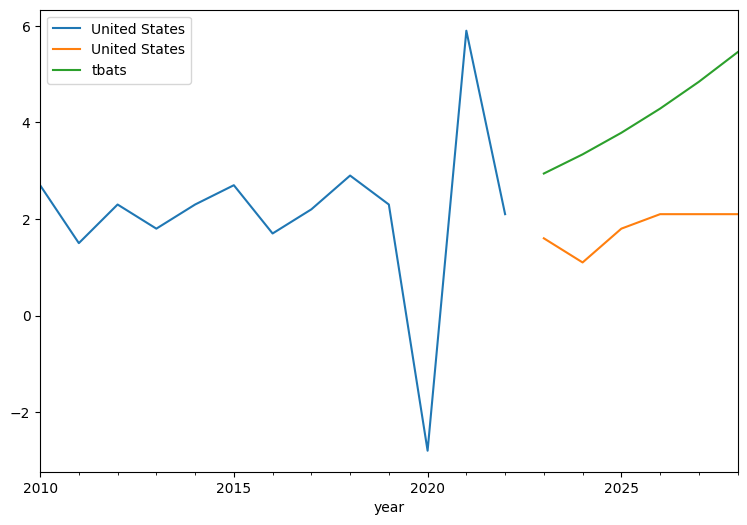

In [19]:
# Visualization
#for country in df_model.columns: 
train_data['United States']['2010-01-01':].plot(figsize = (9,6), legend = True)
test_data['United States'].plot(legend = True)
predictions_tbats.plot(legend = True)

#### KPIS de Avaliação do Modelo
 Indicadores para medir a performance do modelo. MAE e RSME são indicadores de performance para modelos de regressão com variáveis dependentes contínuas. Não existem indicadores considerados 'perfeitos', existem os indicadores melhores apropriados para o problema analisado.

 - MAE - (Mean Absolute Error) É um indicador mais interpretável, utilizado quando a série temporal trata de taxas, porcentagens.
- RSME -  (Root Square Mean Error) São utilizados para modelos com outliers/extremos.
- MAPE - (Mean Absolute Percentage Error) Apesar de tratar os erros de forma absoluta é considerado um indicador mais agradável para comunicar a respeito do modelo. 

In [20]:
# Model Assessment MAE and RSME

from sklearn.metrics import mean_squared_error, mean_absolute_error
#for country in df_model.columns:
print(round(mean_absolute_error(test_data['United States'], predictions_tbats),2))
print(round(np.sqrt(mean_squared_error(test_data['United States'], predictions_tbats)),2))


2.31
2.39


In [21]:
#MAPE function

def MAPE(df_model_true, df_model_pred):
    df_model_true, df_model_pred = np.array(df_model_true), np.array(df_model_pred)
    return np.mean(np.abs((df_model_true - df_model_pred)/ df_model_true)) *100

#for country in df_model.columns:
MAPE(test_data['United States'], predictions_tbats)

132.03348247264796

### Export forecasts for Holt-Winters

In [36]:
## Export forecast

predictions_tbats.to_csv('Projeto/Data/Output/predictions_tbats.csv', index = True)